# Exercise: Is this Drug Working?

In this exercise, we will use the pandas python package, along with matplotlib graphing to look at some simulated data from a (simplified) drug trial. We have a simple question: based on these data, is our drug working? 

## Getting the test data

First, we'll need to download a comma separated values file that contains our drug data. This file can be found [here](./resources/treatment_results.csv). 

First, click on the link to go to the GitHub page for the file. Then, find the 'Raw' button. Right-click on the raw button and select 'Save Link as...'. Double check that the filename ends in `.csv`. If it doesn't, set the filename to `treatment_results.csv`, double-check which folder you are saving the file into, then download the file (by default it will usually go to `Downloads`).

Then, move it to the same folder on your computer that you will be using to for your analysis. You can do this either on the command line or using your graphical user interface (NOTE: you need to remember or write down which one this is so you can get to that same folder in your command line interface before starting jupyter notebooks).


## Examining the test data in Excel

CSV or comma separated values files can be opened in Excel or Google Sheets.

### Opening the data file in Excel
Depending on your version of Excel, you may be able to use one of the following methods:

- `File > Open`, then pick the file. (If you are in the folder where the file is but can't see it, there may be a pulldown menu letting you choose which files Excel 'sees', select 'All Files')
- open Excel separately and drag the `.csv` file from your finder onto it. 
- A final method is to open a new blank sheet and from the Data tab select `Get Data > From File > From Text/CSV`, and then pick your file

### Examining the Data

Now let's check out the data. It should look something like this:

<img src="./resources/data_screenshot.png" alt="An Excel file. There are 4 columns: Patient ID, Patient Age, Patient Health, and Treatment. Under each are numbers. The patient ID column has a unique number for each patient. The first few patient ages range between 15 and 88. The Patient Health column has a number in the thousands representing patient health. The treatment column is categorical and has either 'Treatment' or 'Placebo' marked in each row." width=800>

### Checking the path for your current working directory

Before we try to load the data in our jupyter notebook, we have to move it into the same directory as the current working directory for our notebook.  The `get_cwd` command can tell you the path of your current working directory. This can be useful for moving files into that directory in your finder, or re-downloading them and saving them into that directory.

In [16]:
from os import getcwd
print(getcwd())

/Users/zaneveld/Dropbox/Zaneveld_Lab_Organization/Projects/intro_to_data_studies/content/tabular_data


## Move the file into our current working directory using your graphical user interface

Try to download the file directly into the folder shown by your getcwd() command. Or, if you prefer, download it into Downloads and then move it to your current working directory.

Once you think you've got it there, you can use the `listdir` command from the `os` module to check if its there.

In [19]:
from os import listdir
listdir()

['.DS_Store',
 'exercise_is_this_drug_working.ipynb',
 'resources',
 '.ipynb_checkpoints']

In my case you can see I *didn't* put the file in my current directory (it's not in the list), but instead stuck it into a 'resources' folder within my current working directory. That's OK - we just use another listdir command to check that it is in the resources folder like I expect:

In [20]:
listdir('resources')

['data_screenshot.png', 'treatment_results.csv']

Great! I see it. So wherever your file is, you just need to remember that to load it into pandas, we'll need the *relative path* from our current working directory to where the file is (in my case `./resources/treatment_results.csv', but if it were in the same folder it would just be `treatment_results.csv`)

## Importing pandas and loading the data into python

In [2]:
import pandas as pd

#the data file variable
#should match the *relative path* from
#your current working directory (where you ran Jupyter Notebook from) 
#to the actual data file. Or if the file is in your current working
#directory, you can just use the filename

data_file = './resources/treatment_results.csv'

#Now we load the file into a pandas DataFrame called df
df = pd.read_csv(data_file)

#Show a few rows of our dataframe
df

,PatientID,Patient Age,Patient Health,Treatment
0,0,89,1538,Placebo
1,1,55,1167,Drug
2,2,15,1759,Drug
3,3,42,1361,Drug
4,4,52,1754,Placebo
...,...,...,...,...
95,95,85,718,Drug
96,96,61,1693,Placebo
97,97,38,1429,Drug
98,98,52,1206,Drug


Ideally you should now have a pandas dataframe with the same data as you saw in Excel.

## Troubleshooting: If you get an error saying the file doesn't exist

The most common reason the above will fail, is if the location you are telling python that the file is in doesn't match it's actual location on your computer. 

If you get an error, scroll down to the bottom first! The most important part is the last line. The rest just walks thorugh the steps python took to get to that error, which can be long and complex. 

Read the whole last line of the error message out loud. Seriously! It sounds silly but it can really help to force your brain to engage with the error message (my brain, at least, REALLY wants to gloss over parts of it). If the previous command errored out, the most likely reason is an error that looks something like this:

`FileNotFoundError: [Errno 2] No such file or directory: './resources/treatment_resultss.csv'`

Can you see why I got this error? In my case, I added an extra 's' onto the filename (treatment_resultss.csv instead of treatment_results.csv). Of course, that misspelled file won't exist. In your case the filename may be right, but you may be in a different folder than you specified.

You can use the `listdir` function from python's `os` or operating system module to check what files are in any folder. Just import listdir from os, then call it. If you call it without parameters (like `listdir()`), it will list what's in your current working directory. If you give it a path, it will say what files are at the location you specify.

## Getting x and y data out of our columns



In [3]:
age = list(df['Patient Age'])
treatment = list(df['Treatment'])
response = list(df['Patient Health'])

print(age,treatment,response)

[89, 55, 15, 42, 52, 70, 41, 54, 58, 68, 82, 23, 64, 70, 30, 84, 88, 18, 42, 79, 37, 70, 26, 35, 55, 21, 46, 74, 54, 42, 45, 33, 24, 19, 66, 5, 53, 22, 76, 43, 49, 32, 17, 31, 78, 36, 49, 83, 20, 69, 61, 69, 48, 33, 73, 46, 70, 40, 53, 17, 33, 82, 59, 40, 20, 60, 66, 42, 61, 34, 35, 66, 53, 6, 39, 48, 57, 50, 45, 83, 72, 45, 78, 90, 15, 32, 56, 64, 22, 62, 64, 67, 48, 48, 63, 85, 61, 38, 52, 67] ['Placebo', 'Drug', 'Drug', 'Drug', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Drug', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Drug', 'Drug', 'Placebo', 'Drug', 'Placebo', 'Drug', 'Drug', 'Drug', 'Drug', 'Drug', 'Drug', 'Drug', 'Placebo', 'Drug', 'Drug', 'Drug', 'Drug', 'Placebo', 'Placebo', 'Placebo', 'Drug', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Drug', 'Placebo', 'Placebo', 'Drug', 'Drug', 'Placebo', 'Drug', 'Drug', 'Drug', 'Drug', 'Drug', 'Placebo', 'Drug', 'Placebo', 'Placebo', 'Drug', 'Drug', 'Drug', 'Drug', 'Placebo', 'Pl

## Hypotheses

Based on the data, let's brainstorm a possible question and multiple hypotheses (or possible answers to that question) for these data. We shouldn't be afraid to state obvious or simple hypotheses - these are important.

Here's an example:

**Question:** What are the effects of the drug on patient health?

**Hypotheses**: 

**Null hypothesis:** the drug had no effect on patient health

**Prediction:** the Patient Health number is the same in patients who go the Drug or the Placebo. There is no significant difference in patient health between drug and placebo treatments.
    
Hypothesis: the drug improves patient health for all patients

Hypothesis: the drug negatively impacts patient health for all patients

Hypotheses: does patient health depends on age?

Hypothesis: does the effect of the drug depend on age? (is there an age x treatment effect?)

## Testing our null hypothesis

### We need to split our 'patient health data' into two lists based on whether the patient got a drug or a placebo

In [17]:

age = list(df['Patient Age'])
treatment = list(df['Treatment'])
response = list(df['Patient Health'])

drug_responses = []
placebo_responses = []

for i,r in enumerate(response):
    
    t = treatment[i]
    
    if t == "Drug":
        drug_responses.append(r)
    elif t == "Placebo":
        placebo_responses.append(r)
    else:
        raise ValueError(f"Found a bad treatment value: {t}")

print(drug_responses)
print(placebo_responses)

[1167, 1759, 1361, 759, 1732, 1353, 1435, 1595, 1460, 1153, 1697, 1322, 895, 1171, 1307, 1485, 1646, 1710, 1639, 1529, 1268, 735, 947, 1083, 947, 1284, 1492, 1294, 1216, 1738, 1504, 773, 1707, 1072, 1006, 1201, 1919, 1413, 1236, 742, 937, 1316, 818, 1533, 1146, 1673, 1066, 1030, 1274, 1065, 718, 1429, 1206]
[1538, 1754, 1656, 1800, 1704, 1707, 1659, 1883, 1677, 1657, 1823, 1558, 1547, 1586, 1651, 1798, 1661, 1972, 1726, 1609, 1784, 1739, 1828, 1921, 1604, 1809, 1891, 1642, 1643, 1799, 1699, 1801, 1693, 1653, 1765, 1816, 1812, 1763, 1722, 1765, 1536, 1929, 1692, 1654, 1759, 1693, 1657]


## Make a Boxplot of the Data

Text(0, 0.5, 'Patient Health')

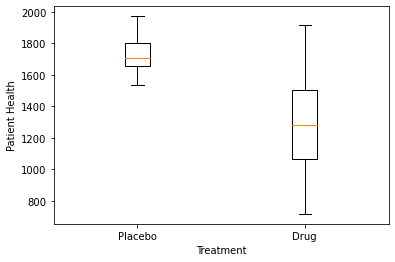

In [23]:
import matplotlib.pyplot as plt
data_to_plot = [placebo_responses,drug_responses]
plt.boxplot(data_to_plot,labels = ["Placebo","Drug"])
plt.xlabel("Treatment")
plt.ylabel("Patient Health")

In [22]:
from scipy.stats import ttest_ind
result = ttest_ind(placebo_responses,drug_responses,equal_var = False)
print(result)

Ttest_indResult(statistic=9.758892432129363, pvalue=2.3179502876771533e-14)


## Testing for age effects on Health

Text(0, 0.5, 'Patient Health')

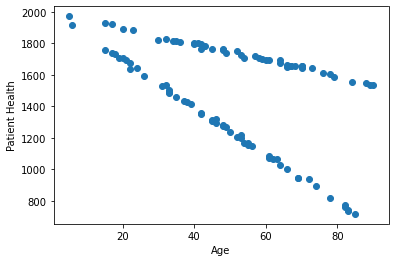

In [6]:
age = list(df['Patient Age'])
response = list(df['Patient Health'])

import matplotlib.pyplot as plt

plt.scatter(age,response)
plt.xlabel("Age")
plt.ylabel("Patient Health")